In [1]:
pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 109.5/109.5 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data


In [4]:
start = '2010-01-01'
end = '2022-10-27'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426001
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433317
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [53]:
data.tail()

AttributeError: module 'pandas_datareader' has no attribute 'tail'

In [6]:
df = df.reset_index()

In [7]:
df.drop(['Date','Adj Close'],axis = 1,inplace=True)

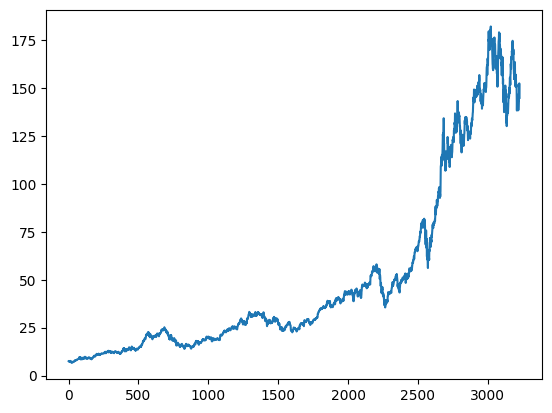

In [8]:
plt.plot(df.Close)

In [9]:
ma100 = df.Close.rolling(100).mean()

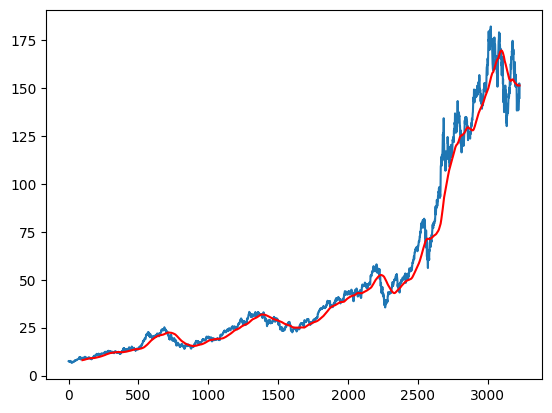

In [11]:
plt.plot(figsize = (10,5))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()

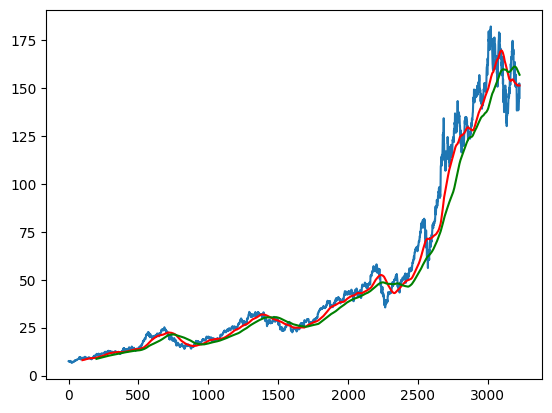

In [15]:
plt.plot(figsize = (15,9))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [16]:
#split train test

data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
data_train.shape

(2260, 1)

In [17]:
data_test.shape

(969, 1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1) )

In [21]:
data_train_array = scaler.fit_transform(data_train)

In [23]:
xtrain = []
ytrain = []

for i in range(100,data_train.shape[0]):
    xtrain.append(data_train_array[i-100:i])
    ytrain.append(data_train_array[i,0])
xtrain,ytrain = np.array(xtrain),np.array(ytrain)    

In [25]:
#ML model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [26]:
model = Sequential() 

In [27]:
xtrain.shape

(2160, 100, 1)

In [28]:
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape =(xtrain.shape[1],1)))

In [29]:
model.add(Dropout(0.2))

In [30]:
#layer 2
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

#layer 3
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

#layer 4
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.4))

In [31]:
model.add(Dense(units=1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [34]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
68/68 [==============================] - 41s 432ms/step - loss: 0.0291
Epoch 2/20
68/68 [==============================] - 26s 377ms/step - loss: 0.0055
Epoch 3/20
68/68 [==============================] - 28s 406ms/step - loss: 0.0042
Epoch 4/20
68/68 [==============================] - 26s 384ms/step - loss: 0.0043
Epoch 5/20
68/68 [==============================] - 26s 389ms/step - loss: 0.0036
Epoch 6/20
68/68 [==============================] - 23s 330ms/step - loss: 0.0033
Epoch 7/20
68/68 [==============================] - 21s 312ms/step - loss: 0.0036
Epoch 8/20
68/68 [==============================] - 21s 314ms/step - loss: 0.0034
Epoch 9/20
68/68 [==============================] - 21s 311ms/step - loss: 0.0033
Epoch 10/20
68/68 [==============================] - 21s 312ms/step - loss: 0.0030
Epoch 11/20
68/68 [==============================] - 21s 312ms/step - loss: 0.0031
Epoch 12/20
68/68 [==============================] - 21s 312ms/step - loss: 0.0028
Epoch 13/20
6

In [35]:
model.save('Keras_LSTM_model.h5')

In [36]:
data_test.head()

,Close
2260,36.707500
2261,39.292500
2262,39.037498
2263,39.057499
2264,39.435001


In [40]:
past_100_days = data_test.tail(100)

In [41]:
final_df = past_100_days.append(data_test,ignore_index=True)
final_df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_12596\3058538544.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test,ignore_index=True)


,Close
0,148.710007
1,147.960007
2,142.639999
3,137.130005
4,131.880005


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.77263812],
       [0.76751736],
       [0.73119401],
       ...,
       [0.79742255],
       [0.77700784],
       [0.74594184]])

In [43]:
input_data.shape

(1069, 1)

In [44]:
xtest = []
ytest = []
for i in range(100,input_data.shape[0]):
    xtest.append(input_data[i-100:i])
    ytest.append(input_data[i,0])
xtest,ytest = np.array(xtest),np.array(ytest) 

In [47]:
print(xtest.shape)
print(ytest.shape)

(969, 100, 1)
(969,)


In [48]:
#making predictions
ypred = model.predict(xtest)
ypred.shape

31/31 [==============================] - 6s 142ms/step


(969, 1)

In [49]:
scaler.scale_

array([0.00682769])

In [50]:
scale_factor = 1/0.00682769
ypred = ypred * scale_factor
ytest = ytest * scale_factor


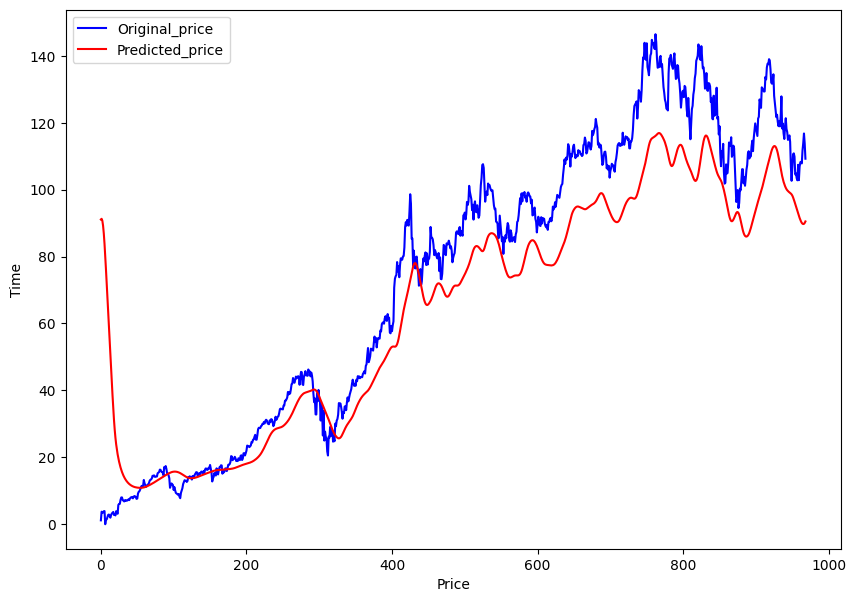

In [51]:
plt.figure(figsize=(10,7))
plt.plot(ytest,'b',label = 'Original_price')
plt.plot(ypred,'r',label = 'Predicted_price')
plt.xlabel('Price')
plt.ylabel('Time')
plt.legend()
plt.show()